In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-olympiad-predicting-earthquake-damage/sample_submission.csv
/kaggle/input/ml-olympiad-predicting-earthquake-damage/train.csv
/kaggle/input/ml-olympiad-predicting-earthquake-damage/test.csv


# **Problem description**

We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

1 represents low damage

2 represents a medium amount of damage

3 represents almost complete destruction

# **Features**

The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.

# **Description**

**geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int):** geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.

**count_floors_pre_eq (type: int):** number of floors in the building before the earthquake.

**age (type: int):** age of the building in years.

**area_percentage (type: int):** normalized area of the building footprint.

**height_percentage (type: int):** normalized height of the building footprint.

**land_surface_condition (type: categorical):** surface condition of the land where the building was built. Possible values: n, o, t.

**foundation_type (type: categorical):** type of foundation used while building. Possible values: h, i, r, u, w.

**roof_type (type: categorical):** type of roof used while building. Possible values: n, q, x.

**ground_floor_type (type: categorical):** type of the ground floor. Possible values: f, m, v, x, z.

**other_floor_type (type: categorical):** type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.

**position (type: categorical):** position of the building. Possible values: j, o, s, t.

**plan_configuration (type: categorical):** building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.

**has_superstructure_adobe_mud (type: binary):** flag variable that indicates if the superstructure was made of Adobe/Mud.

**has_superstructure_mud_mortar_stone (type: binary):** flag variable that indicates if the superstructure was made of Mud Mortar - Stone.

**has_superstructure_stone_flag (type: binary):** flag variable that indicates if the superstructure was made of Stone.

**has_superstructure_cement_mortar_stone (type: binary):** flag variable that indicates if the superstructure was made of Cement Mortar - Stone.

**has_superstructure_mud_mortar_brick (type: binary):** flag variable that indicates if the superstructure was made of Mud Mortar - Brick.

**has_superstructure_cement_mortar_brick (type: binary):** flag variable that indicates if the superstructure was made of Cement Mortar - Brick.

**has_superstructure_timber (type: binary):** flag variable that indicates if the superstructure was made of Timber.

**has_superstructure_bamboo (type: binary):** flag variable that indicates if the superstructure was made of Bamboo.

**has_superstructure_rc_non_engineered (type: binary):** flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.

**has_superstructure_rc_engineered (type: binary):** flag variable that indicates if the superstructure was made of engineered reinforced concrete.

**has_superstructure_other (type: binary):** flag variable that indicates if the superstructure was made of any other material.

**legal_ownership_status (type: categorical):** legal ownership status of the land where building was built. Possible values: a, r, v, w.

**count_families (type: int):** number of families that live in the building.

**has_secondary_use (type: binary):** flag variable that indicates if the building was used for any secondary purpose.

**has_secondary_use_agriculture (type: binary):** flag variable that indicates if the building was used for agricultural purposes.

**has_secondary_use_hotel (type: binary):** flag variable that indicates if the building was used as a hotel.

**has_secondary_use_rental (type: binary):** flag variable that indicates if the building was used for rental purposes.

**has_secondary_use_institution (type: binary):** flag variable that indicates if the building was used as a location of any institution.

**has_secondary_use_school (type: binary):** flag variable that indicates if the building was used as a school.

**has_secondary_use_industry (type: binary):** flag variable that indicates if the building was used for industrial purposes.

**has_secondary_use_health_post (type: binary):** flag variable that indicates if the building was used as a health post.

**has_secondary_use_gov_office (type: binary):** flag variable that indicates if the building was used fas a government office.

**has_secondary_use_use_police (type: binary):** flag variable that indicates if the building was used as a police station.

**has_secondary_use_other (type: binary):** flag variable that indicates if the building was secondarily used for other purposes.

In [2]:
# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Data Import

In [3]:
# Training dataset
df_train = pd.read_csv(r'/kaggle/input/ml-olympiad-predicting-earthquake-damage/train.csv')
df_train.head()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0,3,0,11,4,o,r,x,f,q,...,0,0,0,0,0,0,0,0,0,2
1,1,1,3,11,9,t,i,x,v,s,...,0,0,0,0,0,0,0,0,0,1
2,2,2,0,12,6,t,i,x,v,s,...,0,0,0,0,0,0,0,0,0,1
3,3,1,0,11,3,o,r,n,v,j,...,0,0,0,0,0,0,0,0,0,3
4,4,2,4,25,10,t,i,n,f,x,...,1,0,0,0,0,0,0,0,0,1


In [4]:
#Testing dataset
df_test = pd.read_csv(r'/kaggle/input/ml-olympiad-predicting-earthquake-damage/test.csv')
df_test.head()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,1,3,8,3,t,r,q,f,j,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,10,3,t,i,x,x,j,...,0,0,0,0,0,0,0,0,0,0
2,2,2,16,8,10,t,i,x,v,s,...,0,0,0,0,0,0,0,0,0,0
3,3,3,37,5,5,o,r,n,f,q,...,0,0,0,0,0,0,0,0,0,0
4,4,1,5,5,3,t,u,q,f,j,...,0,1,0,0,0,0,0,0,0,0


In [5]:
# Displaying the features of the dataset
print(f'Features in the dataset are:\n\n{list(df_train.columns)}')

Features in the dataset are:

['building_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_ot

In [6]:
# Number of features and records
print(f'No of records in the train data: {df_train.shape[0]}')
print(f'No of features in the train data: {df_train.shape[1]}')

No of records in the train data: 4000
No of features in the train data: 37


In [7]:
# Shape of dataset
print(f'Shape of the test data: {df_test.shape}')

Shape of the test data: (1000, 36)


In [8]:
# Checking for NULL values in the train data
df_train.isnull().sum()

building_id                               0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered          0
has_superstructure_other        

In [9]:
# Checking for duplicates in the train data
df_train.duplicated().sum()

0

In [10]:
# Number of Unique values in each feature
for i in df_train.columns:
    print(f'No of unique values in {i} are: {df_train[i].nunique()}')

No of unique values in building_id are: 4000
No of unique values in count_floors_pre_eq are: 8
No of unique values in age are: 100
No of unique values in area_percentage are: 39
No of unique values in height_percentage are: 15
No of unique values in land_surface_condition are: 3
No of unique values in foundation_type are: 5
No of unique values in roof_type are: 3
No of unique values in ground_floor_type are: 5
No of unique values in other_floor_type are: 4
No of unique values in position are: 4
No of unique values in plan_configuration are: 10
No of unique values in has_superstructure_adobe_mud are: 2
No of unique values in has_superstructure_mud_mortar_stone are: 2
No of unique values in has_superstructure_stone_flag are: 2
No of unique values in has_superstructure_cement_mortar_stone are: 2
No of unique values in has_superstructure_mud_mortar_brick are: 2
No of unique values in has_superstructure_cement_mortar_brick are: 2
No of unique values in has_superstructure_timber are: 2
No of

In [11]:
# Unique values of each feature
for i in df_train.columns:
    print(f'Unique values in {i} are:\n{df_train[i].unique()}')
    print('*'*100)

Unique values in building_id are:
[   0    1    2 ... 3997 3998 3999]
****************************************************************************************************
Unique values in count_floors_pre_eq are:
[3 1 2 5 4 6 7 8]
****************************************************************************************************
Unique values in age are:
[  0   3   4  30  20  48   2  82   5  99  29  41   1  39  35  47  24  17
  78   9  26  43  51  13  45  33  15  19  10  18  38  46  34  37  79  73
  31  44  21  89  25  12  36  16  52  42   7  11  14  49  50   8  23  58
  84  66  57  74  59  40  55  61   6  54  75  72  22  62  92  32  63  27
  68  77  60  85  83  93  56  91  28  53  64  67  94  76 100  69  88  71
  80  81  65  95  98 108  97  87  70 103]
****************************************************************************************************
Unique values in area_percentage are:
[11 12 25  6  7 13  5  8  9 18 14 10 23 17 15 16 29 21 42  4 20  3 27 24
 22 19 37 26 41 30  2 3

In [12]:
# Value counts of each feature
for i in df_train.columns:
    print(f'Value counts in {i} are:\n{df_train[i].value_counts()}')
    print('*'*100)

Value counts in building_id are:
building_id
3960    1
3961    1
3962    1
3963    1
3964    1
       ..
3       1
4       1
5       1
6       1
7       1
Name: count, Length: 4000, dtype: int64
****************************************************************************************************
Value counts in count_floors_pre_eq are:
count_floors_pre_eq
2    1982
3     979
1     807
4     110
5      86
6      21
7      12
8       3
Name: count, dtype: int64
****************************************************************************************************
Value counts in age are:
age
0      763
30     306
1      267
2      248
3      222
      ... 
69       1
97       1
87       1
70       1
103      1
Name: count, Length: 100, dtype: int64
****************************************************************************************************
Value counts in area_percentage are:
area_percentage
7     853
6     517
5     510
10    289
11    285
8     280
9     275
12    217
13    140
14 

In [13]:
# Basic info about the train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             4000 non-null   int64 
 1   count_floors_pre_eq                     4000 non-null   int64 
 2   age                                     4000 non-null   int64 
 3   area_percentage                         4000 non-null   int64 
 4   height_percentage                       4000 non-null   int64 
 5   land_surface_condition                  4000 non-null   object
 6   foundation_type                         4000 non-null   object
 7   roof_type                               4000 non-null   object
 8   ground_floor_type                       4000 non-null   object
 9   other_floor_type                        4000 non-null   object
 10  position                                4000 non-null   object
 11  plan

In [14]:
# Statistical information about the features
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,4000.0,1999.50000,1154.844867,0.0,999.75,1999.5,2999.25,3999.0
count_floors_pre_eq,4000.0,2.20300,0.946052,1.0,2.00,2.0,3.00,8.0
age,4000.0,18.01575,19.394717,0.0,1.00,12.0,30.00,108.0
area_percentage,4000.0,9.39900,5.149945,2.0,6.00,7.0,11.00,42.0
height_percentage,4000.0,5.56750,2.255375,2.0,4.00,5.0,6.00,16.0
has_superstructure_adobe_mud,4000.0,0.10550,0.307235,0.0,0.00,0.0,0.00,1.0
has_superstructure_mud_mortar_stone,4000.0,0.53275,0.498989,0.0,0.00,1.0,1.00,1.0
has_superstructure_stone_flag,4000.0,0.03025,0.171296,0.0,0.00,0.0,0.00,1.0
has_superstructure_cement_mortar_stone,4000.0,0.11025,0.313240,0.0,0.00,0.0,0.00,1.0
has_superstructure_mud_mortar_brick,4000.0,0.11950,0.324416,0.0,0.00,0.0,0.00,1.0


## Exploratory Data Analysis (EDA)

In [15]:
# Separating numerical and categorical features of training data
df_train_num = df_train.select_dtypes(include = np.number)
df_train_cat = df_train.select_dtypes(exclude = np.number)

In [16]:
# Separating numerical and categorical features of testing data
df_test_num = df_test.select_dtypes(include = np.number)
df_test_cat = df_test.select_dtypes(exclude = np.number)

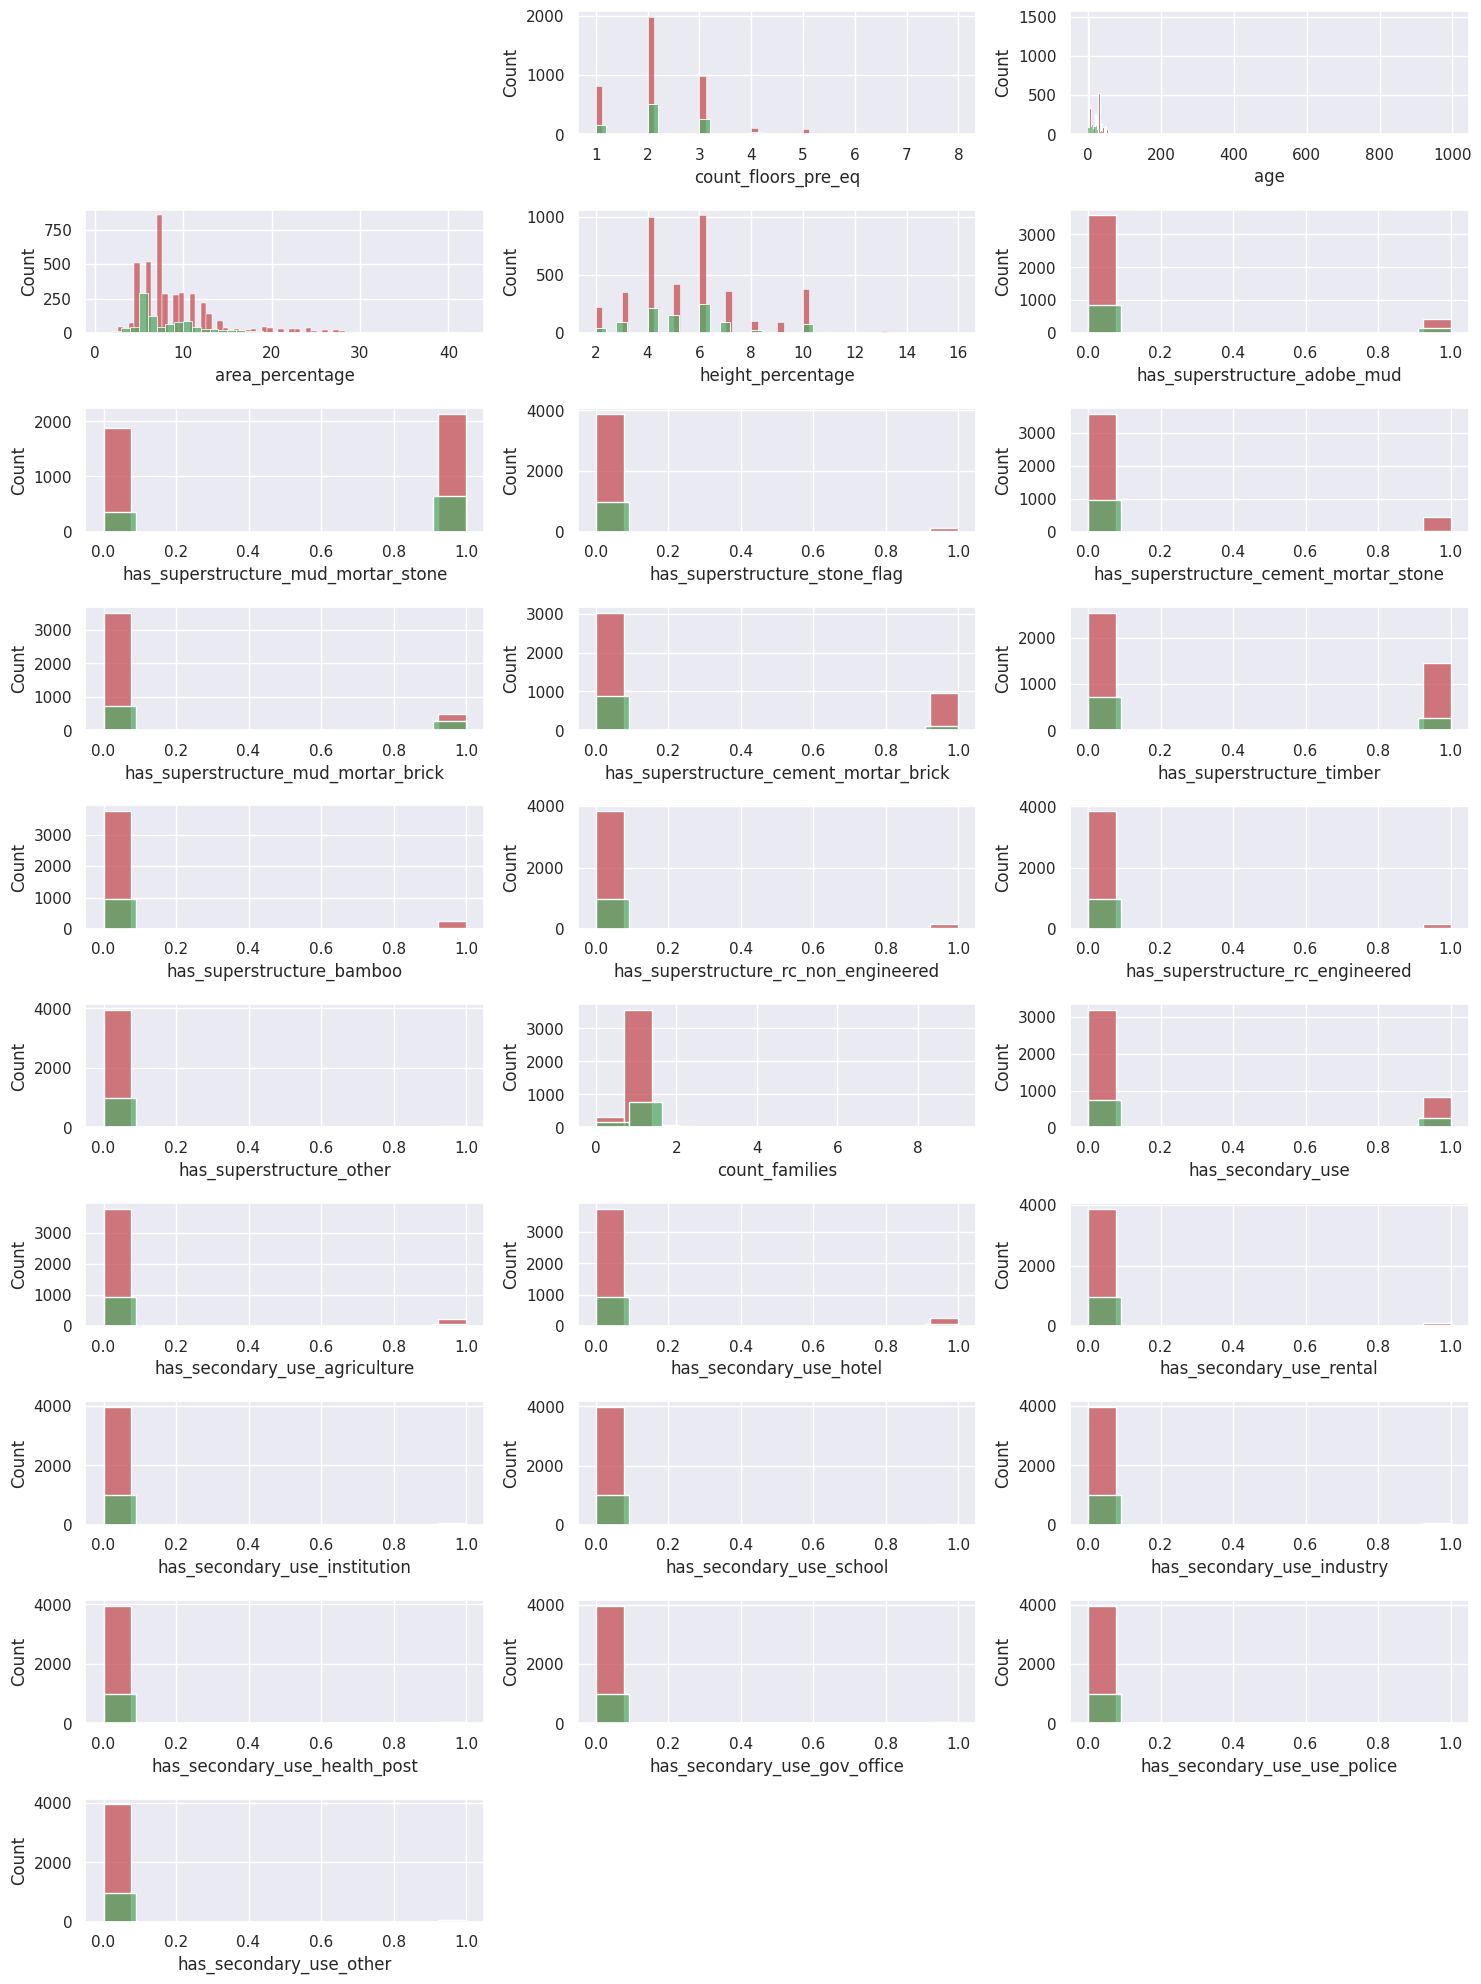

In [17]:
# Distribution of features in train and test data
plt.figure(figsize=(15,20))
for col in range(1,len(df_train_num.columns)):
    if df_train_num.columns[col] != 'damage_grade':
        plt.subplot(10,3,col+1)
        sns.histplot(df_train_num,x = df_train_num.columns[col],color = 'r')
        sns.histplot(df_test_num,x = df_test_num.columns[col],color = 'g')
plt.tight_layout()
plt.show()

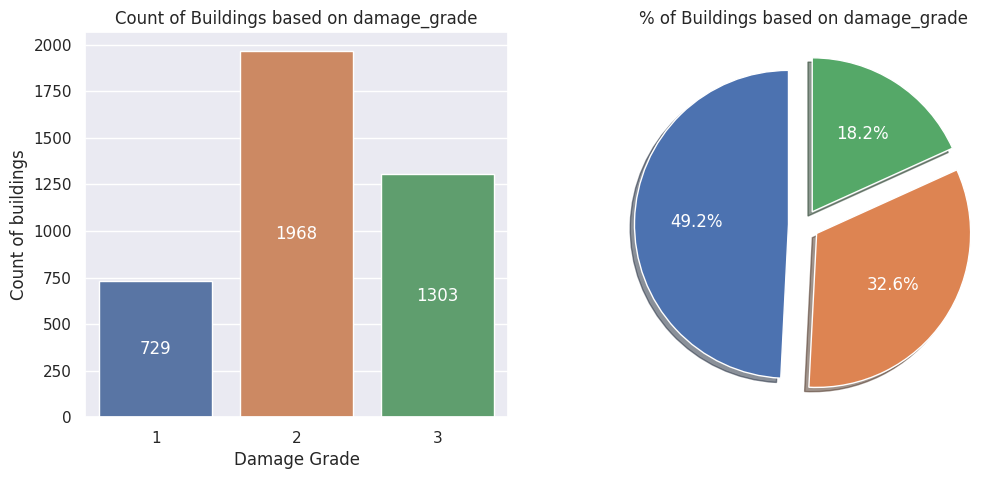

In [18]:
# Buildings based on damage_grade
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
ax = sns.countplot(df_train, x = 'damage_grade')
ax.bar_label(ax.containers[0],label_type='center',color = 'white' )
plt.title('Count of Buildings based on damage_grade')
plt.xlabel('Damage Grade')
plt.ylabel('Count of buildings')

plt.subplot(1,2,2)
plt.pie(df_train['damage_grade'].value_counts(), labels = df_train['damage_grade'].value_counts().index,
        autopct='%.1f%%', startangle = 90, textprops = {'color':'white', 'size':12}, explode = [.1,.1,.1], shadow = True)
plt.title('% of Buildings based on damage_grade')
plt.show()

Percentage of buildings with low level of damage: 18.2%

Percentage of buildings with medium level of damage: 49.2%

Percentage of buildings with high level of damage: 32.6%

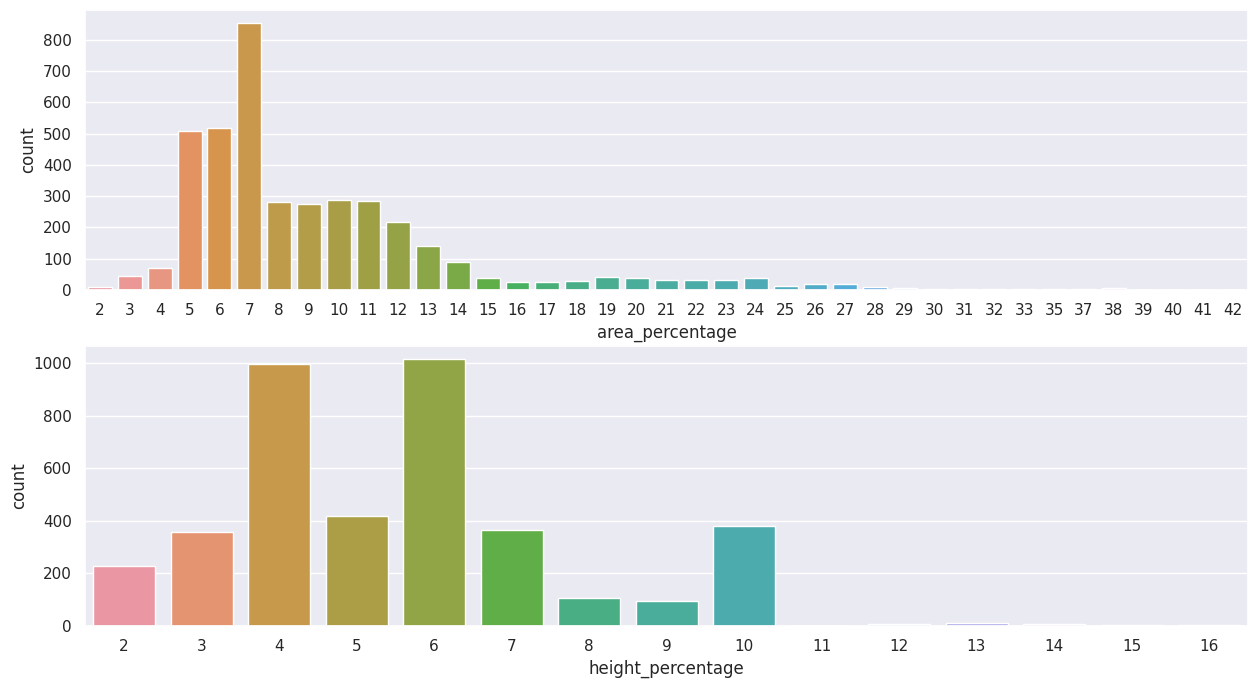

In [19]:
# Study of area_percentage and height_percentage
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.countplot(df_train, x = 'area_percentage')
plt.subplot(2,1,2)
sns.countplot(df_train, x = 'height_percentage')
plt.show()

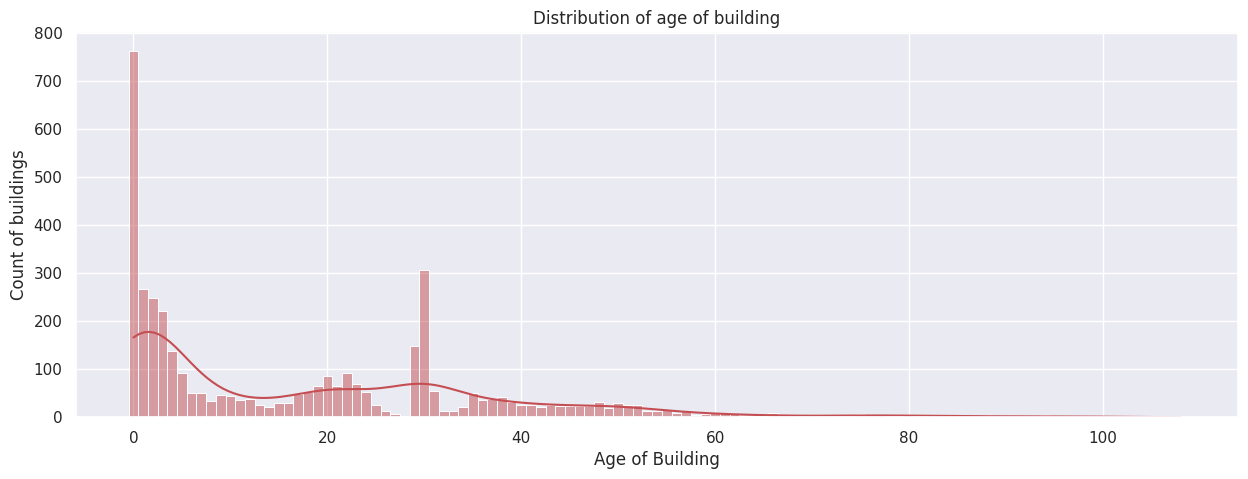

In [20]:
# Distribution of the feature age:
plt.figure(figsize = (15,5))
sns.histplot(df_train, x = 'age', bins = 11, color = 'r', discrete = 1, kde = True)
plt.title('Distribution of age of building')
plt.xlabel('Age of Building')
plt.ylabel('Count of buildings')
plt.show()

Most of the buildings in the train data are new buildings that are 0 years old, followed by 30 year old buildings

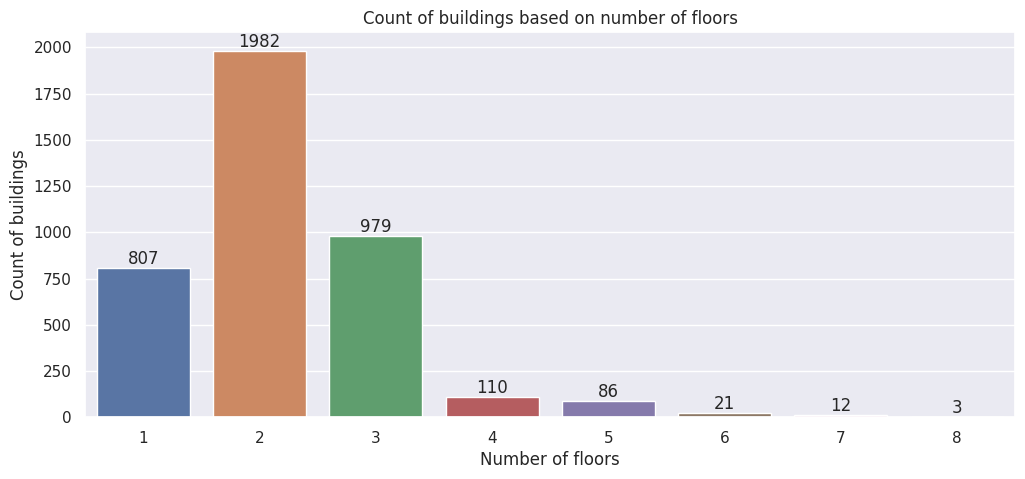

In [21]:
# Count of buildings based on number of floors
plt.figure(figsize=(12,5))
ax = sns.countplot(df_train, x = 'count_floors_pre_eq')
ax.bar_label(ax.containers[0])
plt.title('Count of buildings based on number of floors')
plt.xlabel('Number of floors')
plt.ylabel('Count of buildings')
plt.show()

Most buildings are two storeyed in the dataset

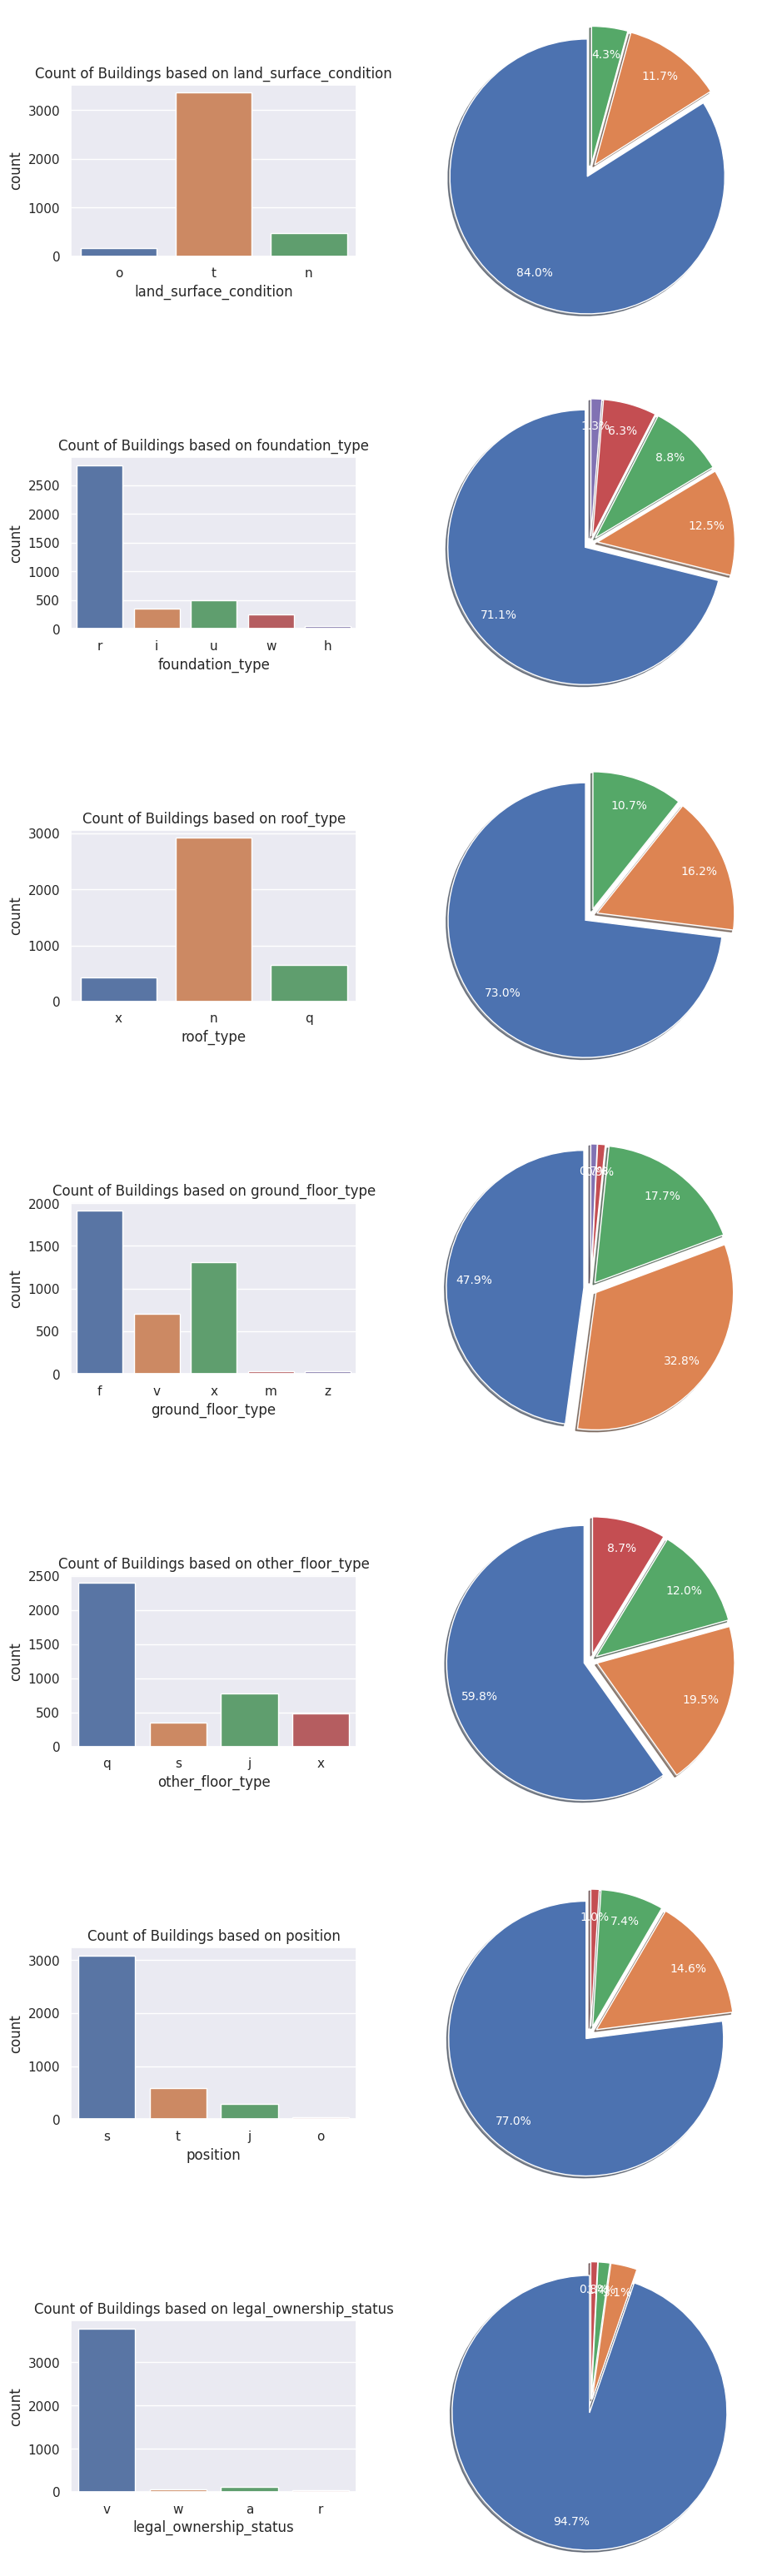

In [22]:
# Study of categorical variables in the training data
plt.figure(figsize=(10,35))
count = 1
x = 0
for col in range(len(df_train_cat.columns)):
    if df_train_cat.columns[col] != 'plan_configuration':
        plt.subplot(8,2,count)
        plt.title(f'Count of Buildings based on {df_train_cat.columns[col]}')
        sns.countplot(df_train_cat, x = df_train_cat.columns[col])
        plt.xlabel(df_train_cat.columns[col])
        count += 1
        for col in range(len(df_train_cat.columns)):
            plt.subplot(8,2,count)
            col += x
            if df_train_cat.columns[col] == 'plan_configuration':
                continue
            else:
                plt.pie(df_train_cat[df_train_cat.columns[col]].value_counts(),shadow = True,
                        explode = [.1 for i in range(df_train_cat[df_train_cat.columns[col]].nunique())],
                        labels = df_train_cat[df_train_cat.columns[col]].value_counts().index,
                        autopct='%.1f%%', startangle = 90, radius = 2, textprops = {'color':'white', 'size':10},
                        pctdistance=0.8)
                #plt.title(f'% of Buildings based on {df_train_cat.columns[col]}')
                x +=1
                count +=1
                break
plt.tight_layout()
plt.show()

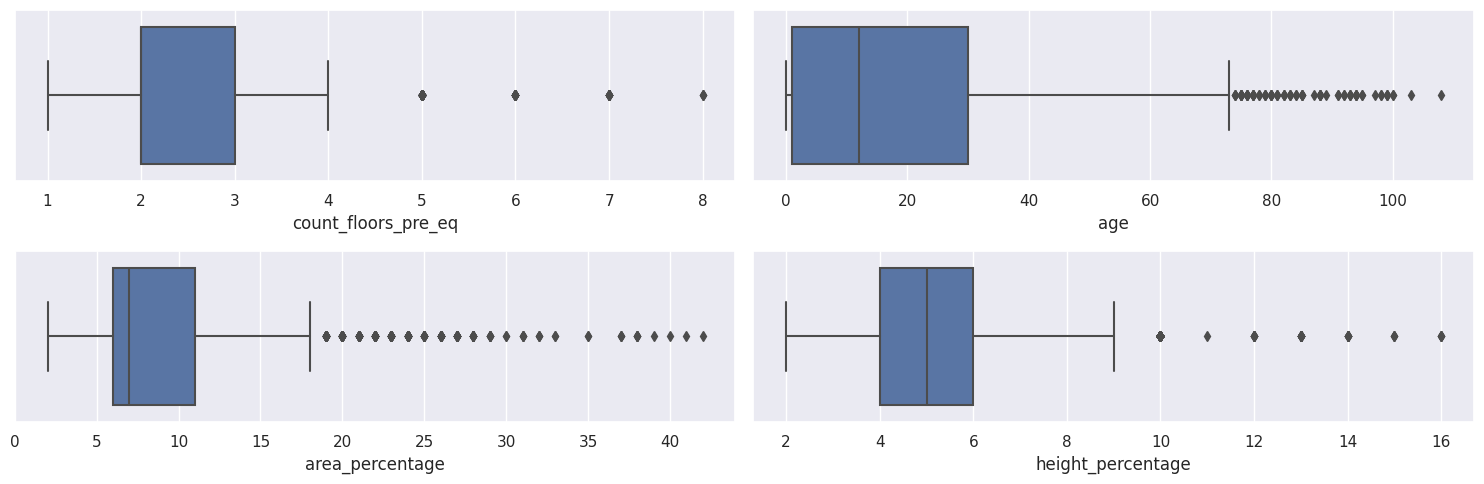

In [23]:
# Distribution of the features 'count_floors_pre_eq', 'age', 'area_percentage','height_percentage'
plt.figure(figsize=(15,5))
y = 1
columns = ['count_floors_pre_eq', 'age', 'area_percentage','height_percentage']
for col in columns:
    plt.subplot(2,2,y)
    sns.boxplot(df_train,x = col)
    y +=1
plt.tight_layout()
plt.show()

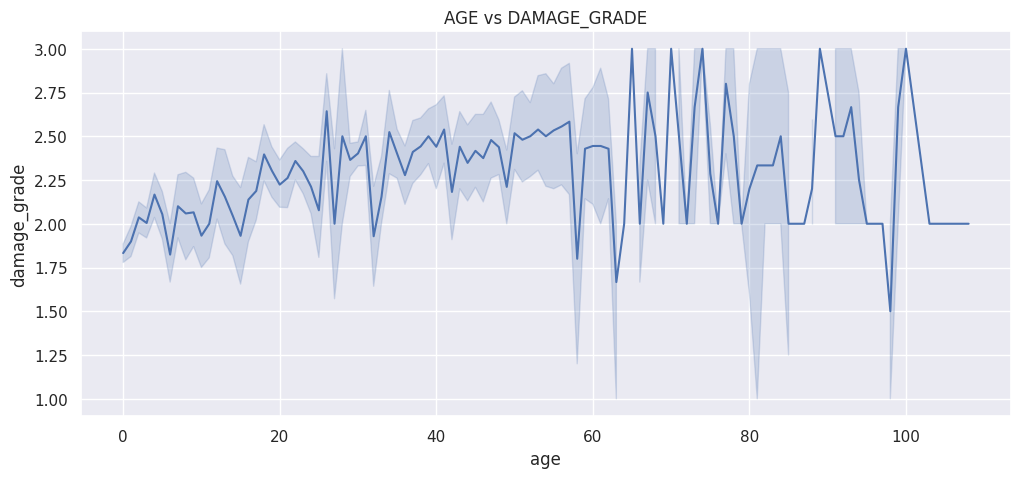

In [24]:
# Effect of age of building on the damage grade
plt.figure(figsize = (12,5))
sns.lineplot(df_train, x = 'age', y = 'damage_grade')
plt.title('AGE vs DAMAGE_GRADE')
plt.show()

Buildings that are more than 60 years old have had medium to high level of damage due to the earthquake

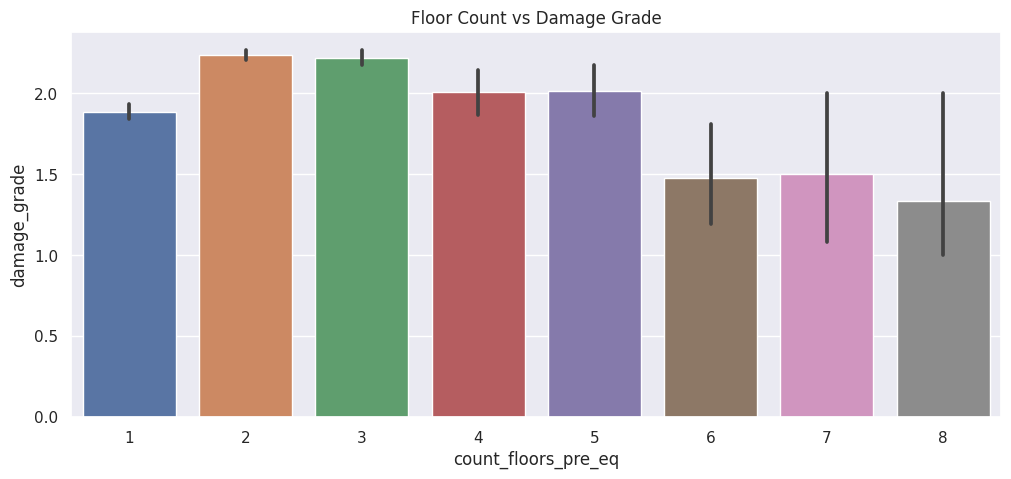

In [25]:
# Effect of floor count on damage_grade
plt.figure(figsize = (12,5))
sns.barplot(df_train, x = 'count_floors_pre_eq', y = 'damage_grade')
plt.title('Floor Count vs Damage Grade')
plt.show()

Mostly 2 and 3 storeyed buildings have had severe damage due to the earthquake

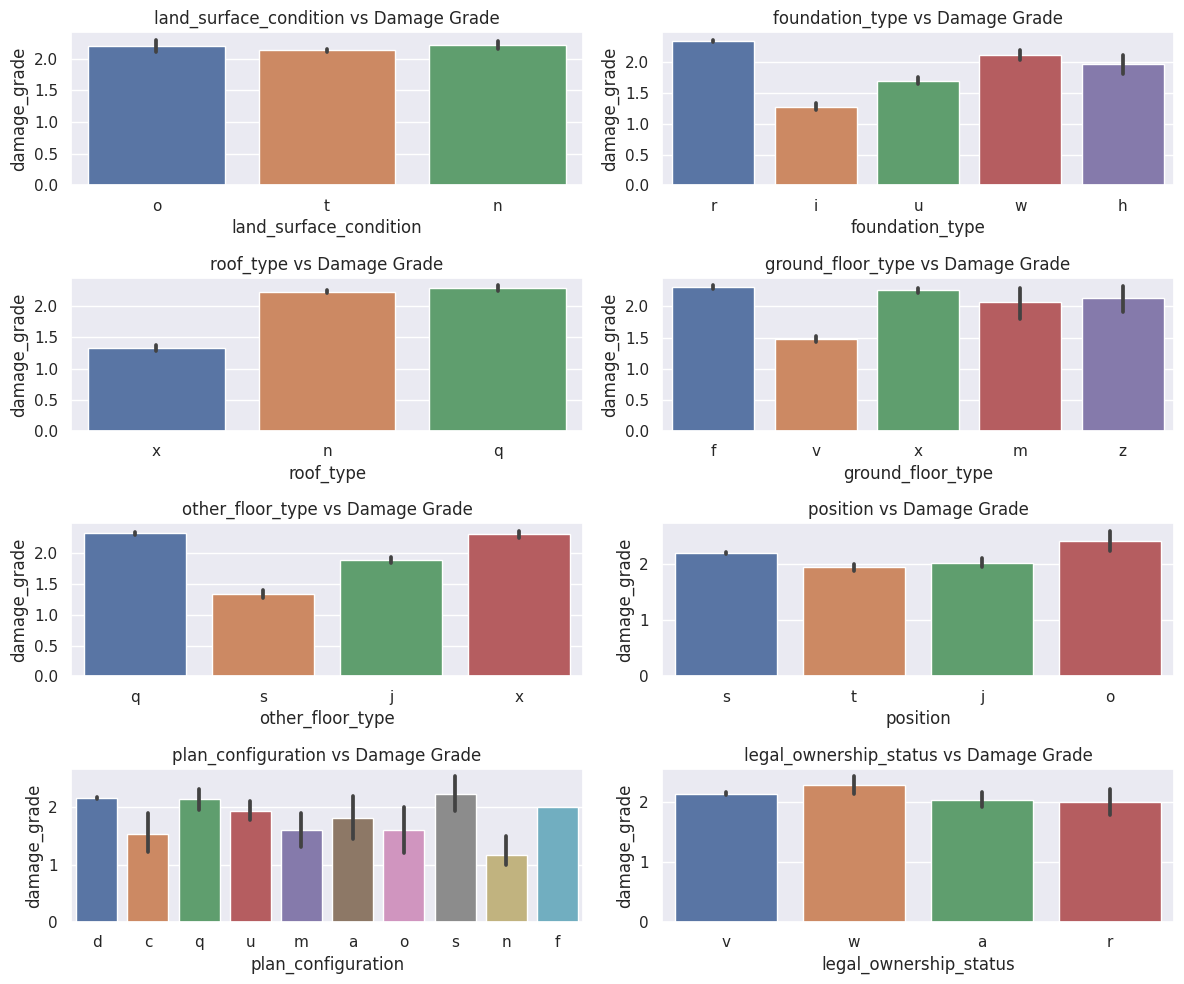

In [26]:
# Effect of categorical features on damage_grade
plt.figure(figsize = (12,10))
x = 1
for col in df_train_cat.columns:
    plt.subplot(4,2,x)
    sns.barplot(df_train, x = col, y = 'damage_grade')
    plt.title(f'{col} vs Damage Grade')
    x+=1
plt.tight_layout()
plt.show()

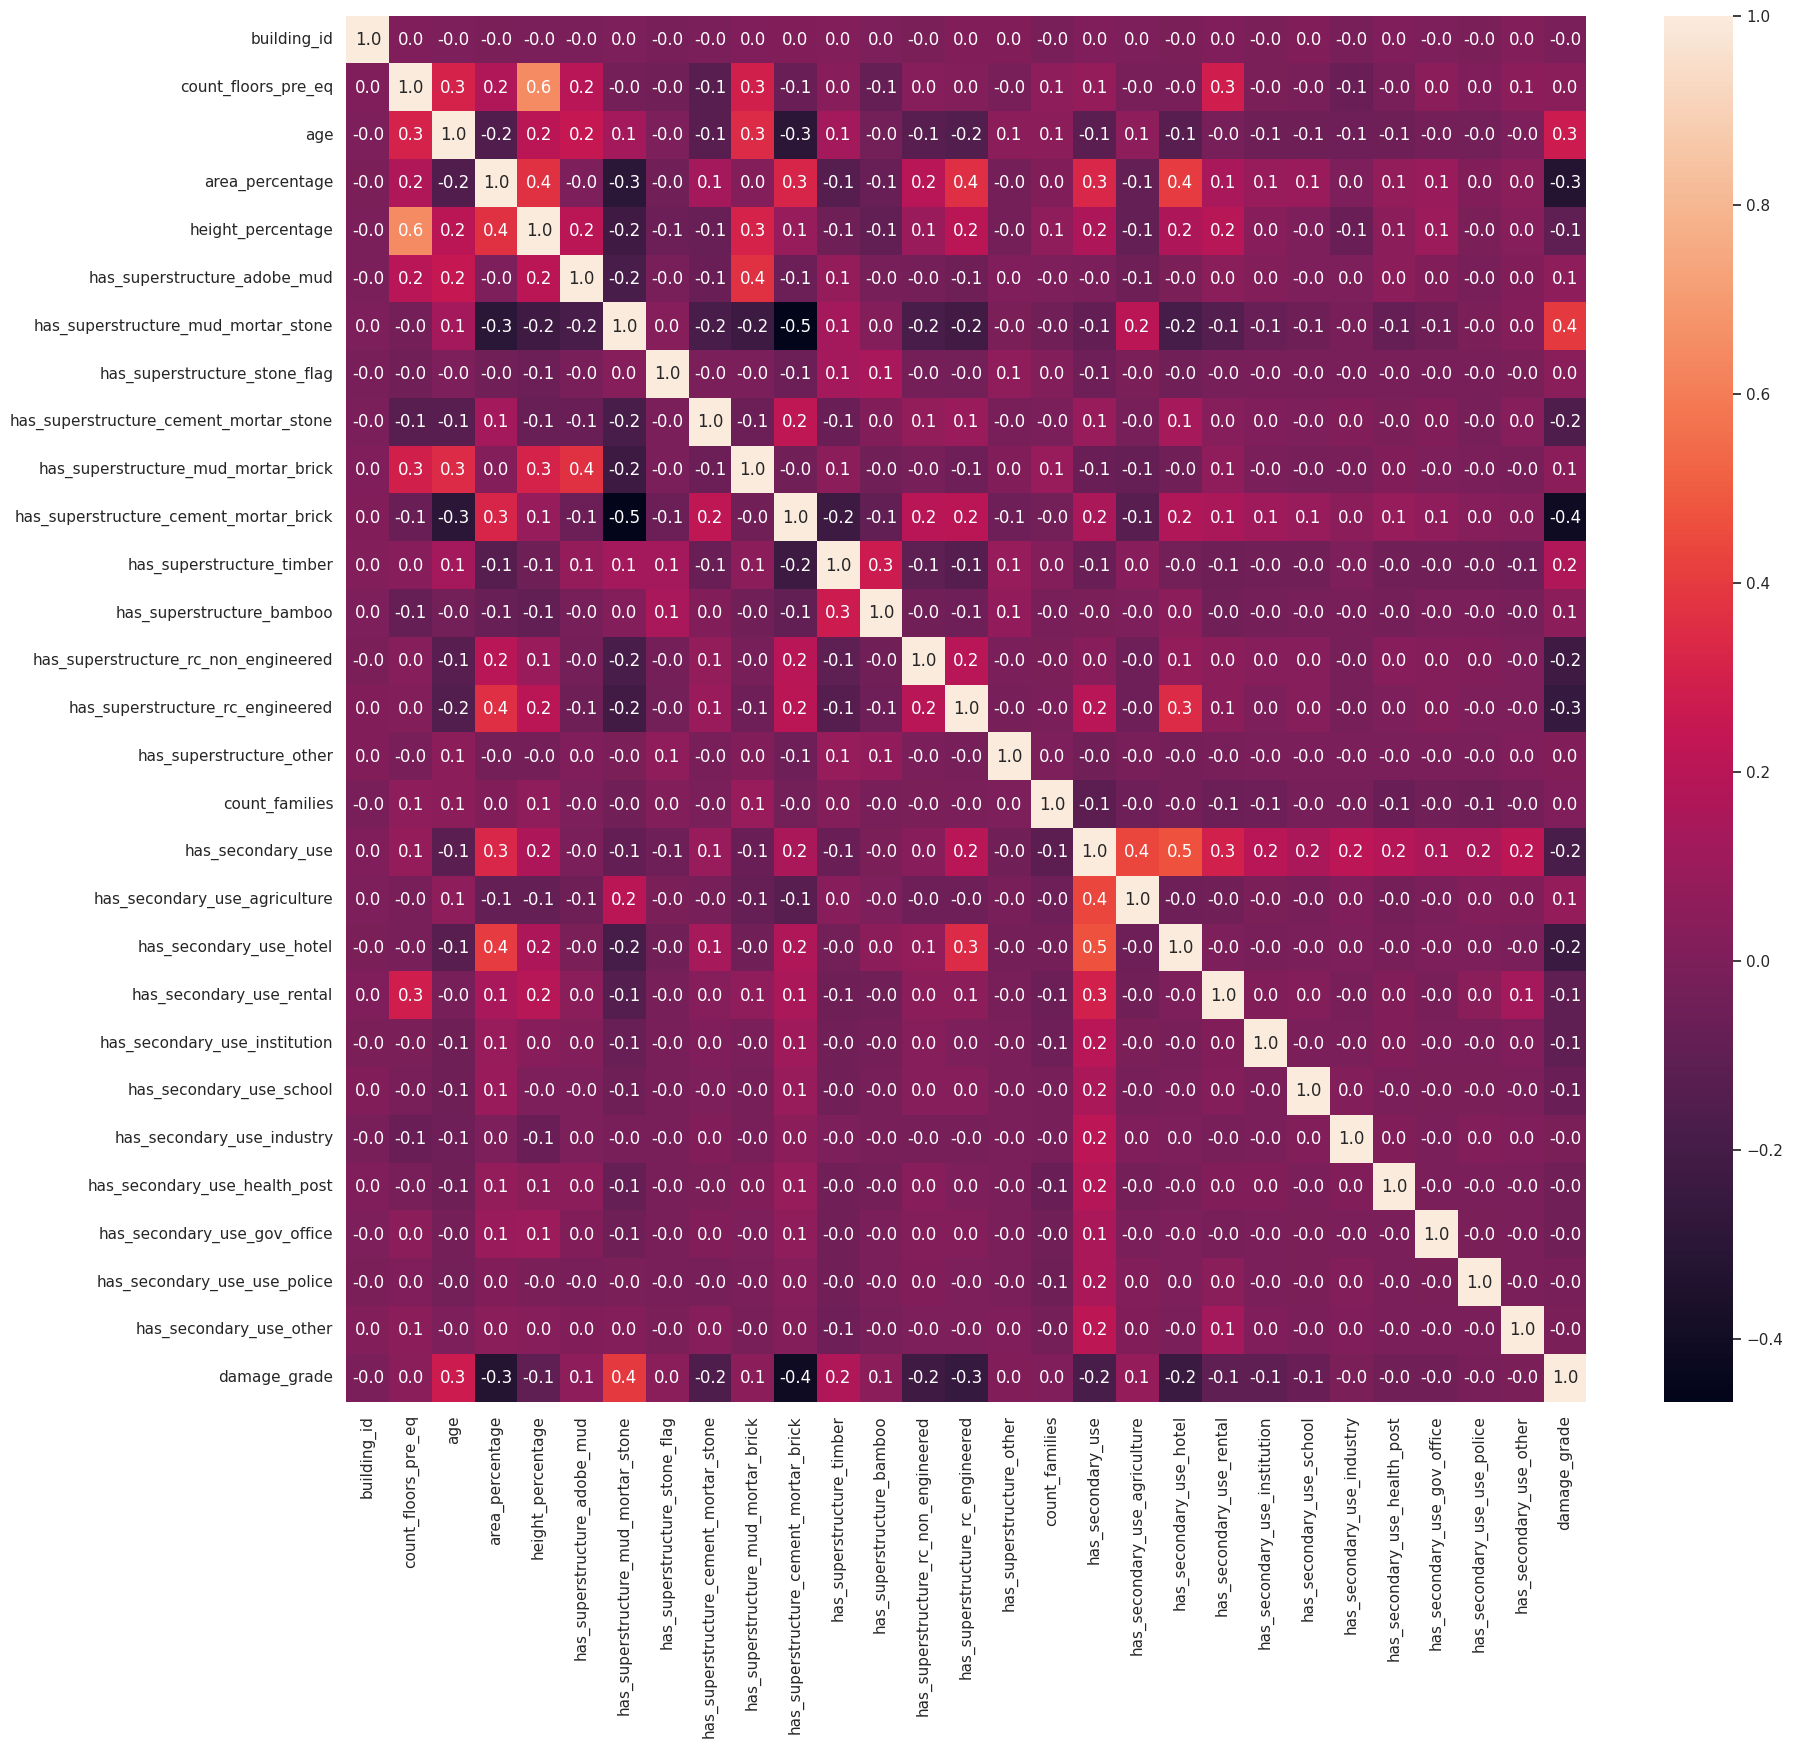

In [27]:
# Checking for correlation of numerical features in train data using heatmap 
plt.figure(figsize = (20,18))
sns.heatmap(df_train_num.corr(), annot = True, fmt = '.1f')
plt.show()

# Data Preparation

In [28]:
# Splitting the training data into features and target
x = df_train.drop('damage_grade',axis = 1)
y = df_train['damage_grade']

In [29]:
# Creating a function to apply the required preprocessing on the features of training data
def preprocessing(data):
    data.drop('building_id', axis = 1, inplace = True) # dropping building_id feature
    data = pd.get_dummies(data, columns = list(df_train_cat.columns), drop_first = True) #OneHotEncoding of categorical features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns) # Scaling the features
    return data

In [30]:
x = preprocessing(x) # applying the created function on the features of train data

# Data Imbalance correction

In [31]:
# Correction of the imabalnce in the dataset using SMOTE method
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y) 
print("Original value count :\n", y.value_counts())
print("*************SMOTE Method**********************")
print("After Smote value count :\n", y_smote.value_counts())

Original value count :
 damage_grade
2    1968
3    1303
1     729
Name: count, dtype: int64
*************SMOTE Method**********************
After Smote value count :
 damage_grade
2    1968
1    1968
3    1968
Name: count, dtype: int64


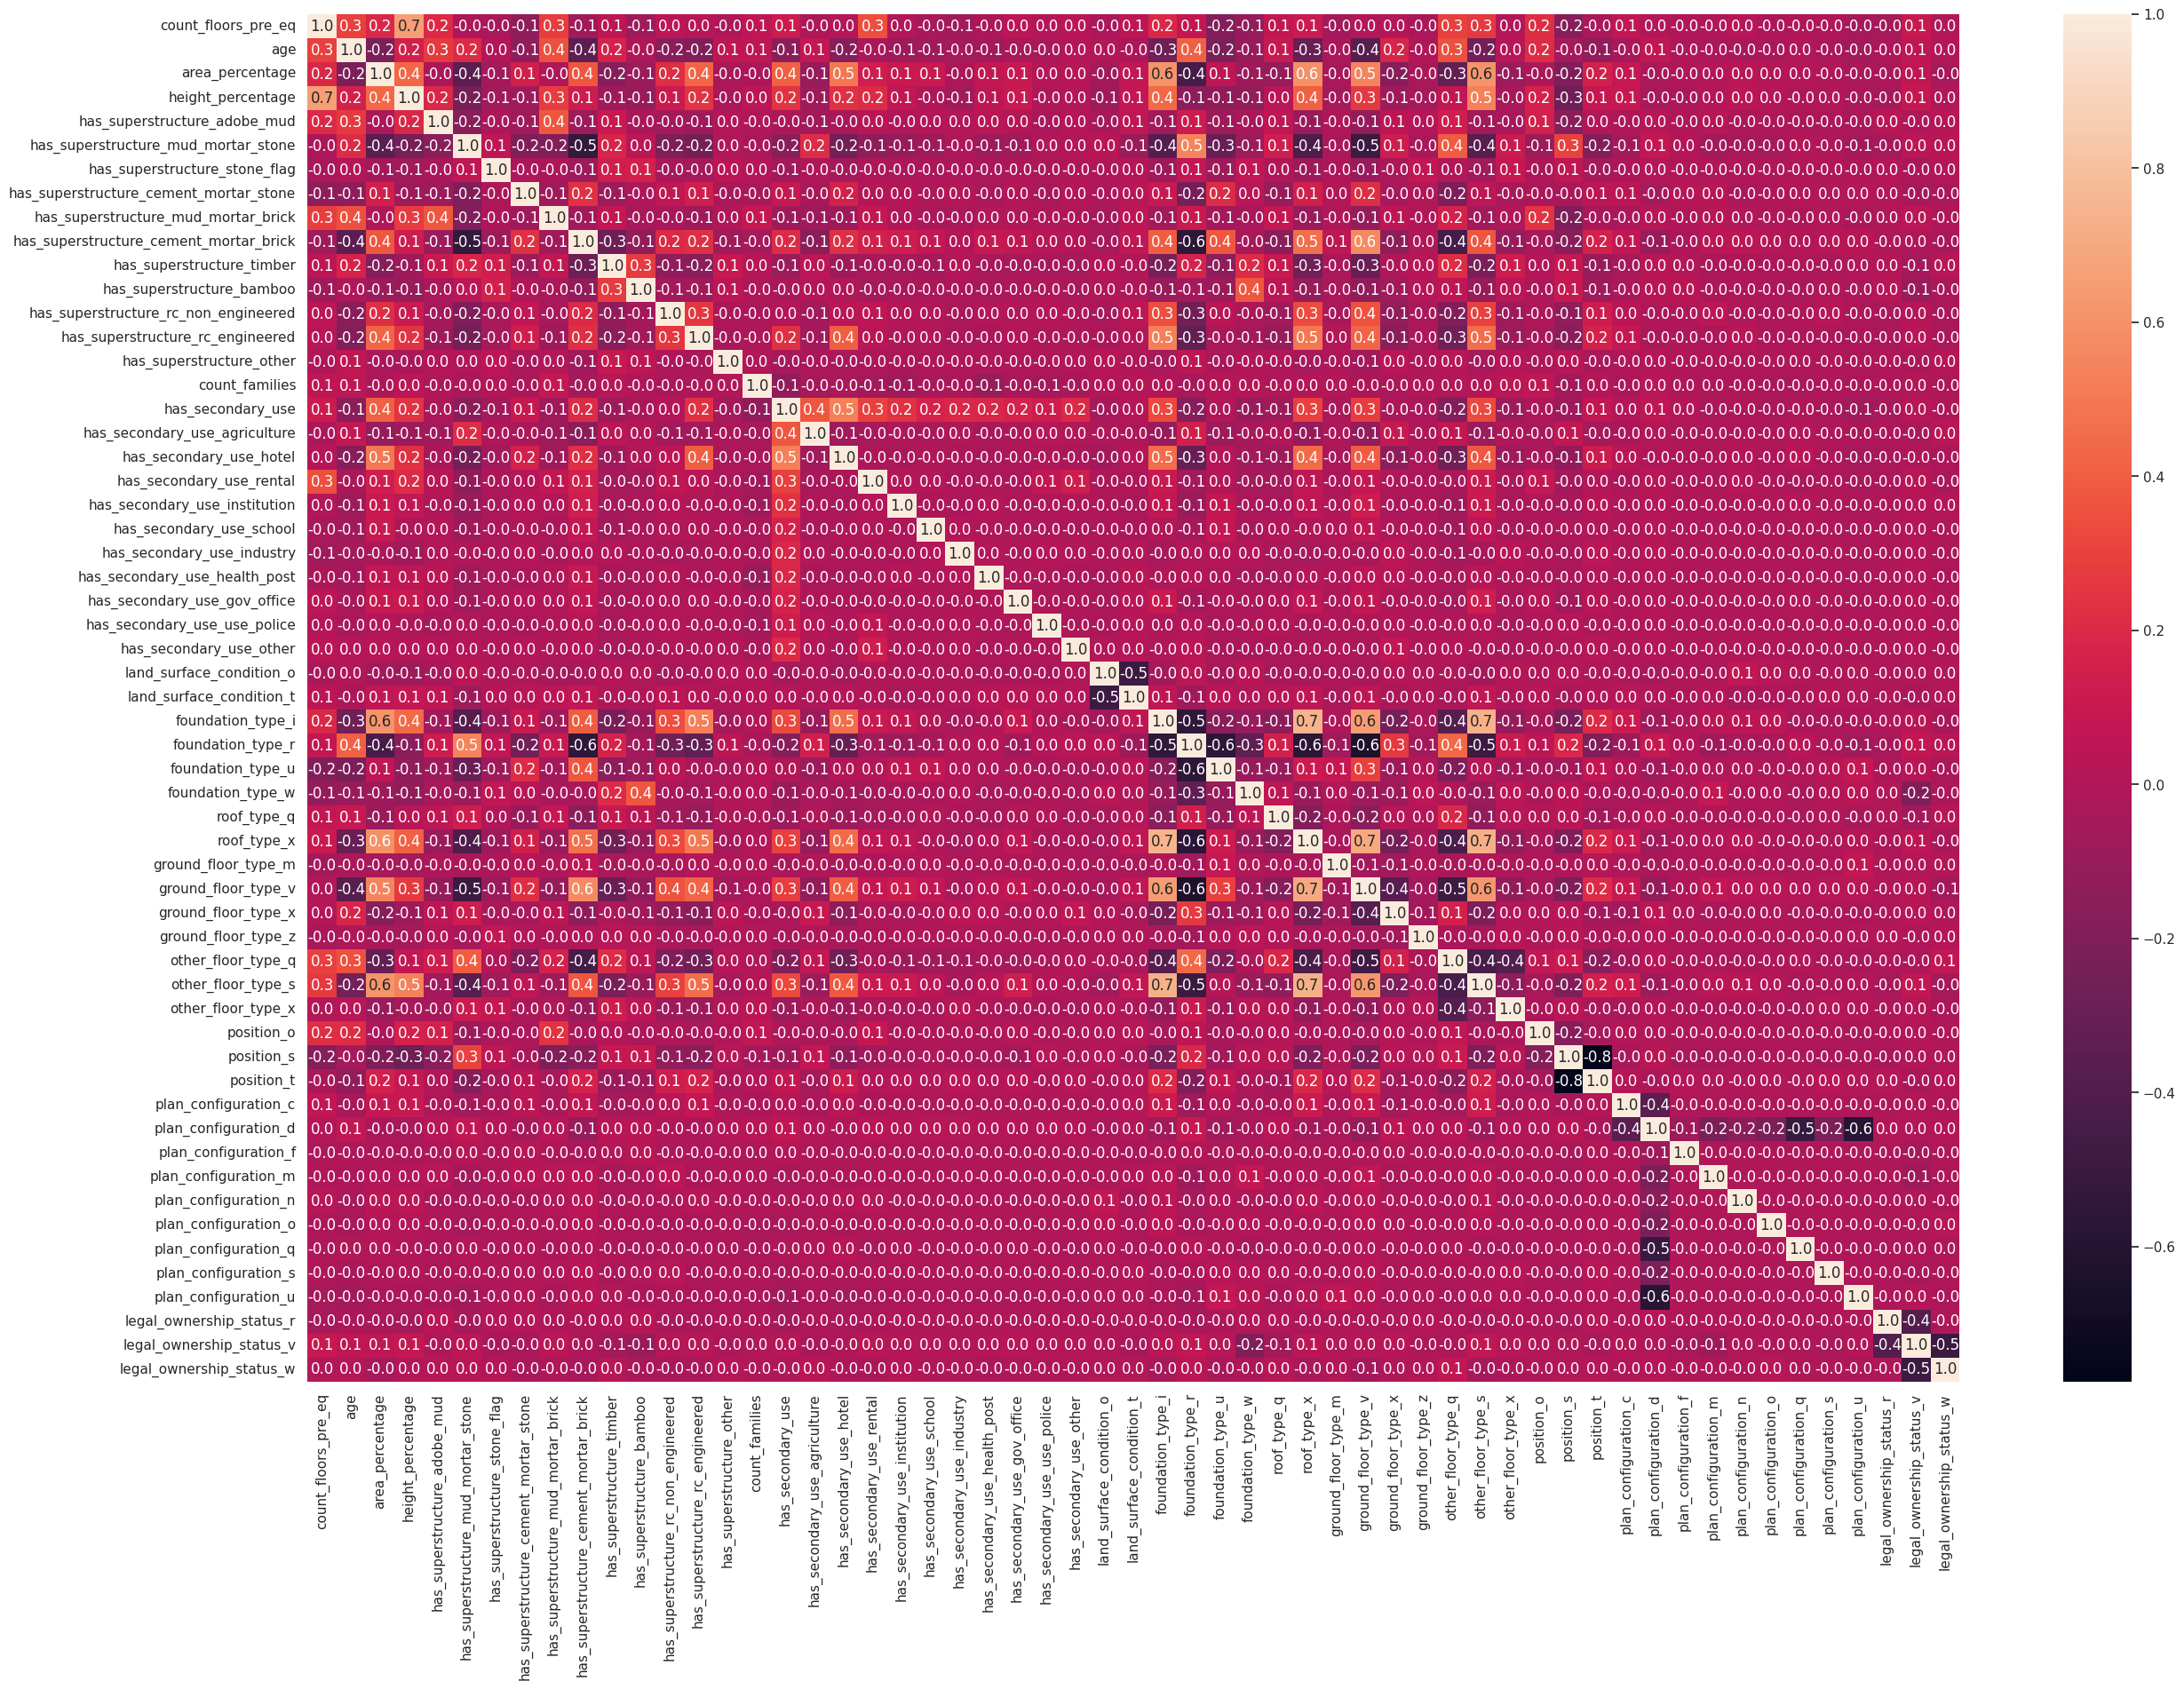

In [32]:
# Checking for correlation after correcting the imbalance
plt.figure(figsize = (30,20))
sns.heatmap(x_smote.corr(), annot = True, fmt = '.1f')
plt.show()

In [33]:
# Encoding the target variable 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_smote_encoded = le.fit_transform(y_smote)

# Checking for important features

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_smote, y_smote_encoded)
rf_featimp = pd.DataFrame({'Feature': x_smote.columns, 'RF_Importance':rf.feature_importances_}).\
sort_values(by='RF_Importance',ascending = False)
rf_featimp

,Feature,RF_Importance
1,age,0.136353
2,area_percentage,0.112814
3,height_percentage,0.076369
5,has_superstructure_mud_mortar_stone,0.055119
9,has_superstructure_cement_mortar_brick,0.052246
0,count_floors_pre_eq,0.045815
30,foundation_type_r,0.043358
36,ground_floor_type_v,0.038413
10,has_superstructure_timber,0.033068
39,other_floor_type_q,0.032974


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_smote, y_smote_encoded)
gb_featimp = pd.DataFrame({'Feature': x_smote.columns, 'GB_Importance':gb.feature_importances_}).\
sort_values(by='GB_Importance',ascending = False)
gb_featimp

,Feature,GB_Importance
36,ground_floor_type_v,1.907170e-01
9,has_superstructure_cement_mortar_brick,1.428704e-01
30,foundation_type_r,1.277207e-01
5,has_superstructure_mud_mortar_stone,8.820329e-02
2,area_percentage,8.371753e-02
1,age,5.721557e-02
3,height_percentage,4.098831e-02
34,roof_type_x,3.957818e-02
0,count_floors_pre_eq,3.112070e-02
39,other_floor_type_q,2.666507e-02


In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_smote, y_smote_encoded)
dt_featimp = pd.DataFrame({'Feature': x_smote.columns, 'DT_Importance':dt.feature_importances_}).\
sort_values(by='DT_Importance',ascending = False)
dt_featimp

,Feature,DT_Importance
36,ground_floor_type_v,0.175174
1,age,0.134204
2,area_percentage,0.114824
3,height_percentage,0.069511
9,has_superstructure_cement_mortar_brick,0.055754
0,count_floors_pre_eq,0.033839
10,has_superstructure_timber,0.033355
37,ground_floor_type_x,0.030260
5,has_superstructure_mud_mortar_stone,0.029430
33,roof_type_q,0.027869


Removing unwanted features by comparing the least important features obtained by RandomForest, GradientBoost, DecisionTree

In [37]:
# RF
# 56	legal_ownership_status_w	0.002557
# 20	has_secondary_use_institution	0.002192
# 23	has_secondary_use_health_post	0.002144
# 35	ground_floor_type_m	0.001893
# 21	has_secondary_use_school	0.001799
# 42	position_o	0.001688
# 54	legal_ownership_status_r	0.001673
# 25	has_secondary_use_use_police	0.001571
# 24	has_secondary_use_gov_office	0.001282
# 52	plan_configuration_s	0.000835
# 45	plan_configuration_c	0.000667
# 50	plan_configuration_o	0.000431
# 48	plan_configuration_m	0.000301
# 49	plan_configuration_n	0.000275
# 47	plan_configuration_f	0.000069



# GB
# 25	has_secondary_use_use_police	0.001004
# 27	land_surface_condition_o	0.000644
# 54	legal_ownership_status_r	0.000613
# 6	has_superstructure_stone_flag	0.000581
# 51	plan_configuration_q	0.000577
# 40	other_floor_type_s	0.000449
# 24	has_secondary_use_gov_office	0.000413
# 23	has_secondary_use_health_post	0.000269
# 50	plan_configuration_o	0.000252
# 48	plan_configuration_m	0.000219
# 45	plan_configuration_c	0.000201
# 49	plan_configuration_n	0.000199
# 46	plan_configuration_d	0.000159
# 35	ground_floor_type_m	0.000136
# 47	plan_configuration_f	0.000019


# DT
# 21	has_secondary_use_school	0.002816
# 14	has_superstructure_other	0.002741
# 23	has_secondary_use_health_post	0.002559
# 35	ground_floor_type_m	0.002304
# 56	legal_ownership_status_w	0.001937
# 25	has_secondary_use_use_police	0.001474
# 54	legal_ownership_status_r	0.001098
# 45	plan_configuration_c	0.000586
# 42	position_o	0.000490
# 24	has_secondary_use_gov_office	0.000452
# 49	plan_configuration_n	0.000430
# 48	plan_configuration_m	0.000426
# 50	plan_configuration_o	0.000365
# 52	plan_configuration_s	0.000248
# 47	plan_configuration_f	0.000000



In [38]:
# Features to be removed based on least importance and having high correlation
cols_to_remove = ['plan_configuration_f', 'plan_configuration_o', 'plan_configuration_m', 'plan_configuration_n',
                  'has_secondary_use_gov_office','plan_configuration_c', 'legal_ownership_status_r', 'ground_floor_type_m',
                  'has_secondary_use_health_post','has_secondary_use_use_police','position_t']

In [39]:
# Dropping the unwanted features
x_smote.drop(cols_to_remove, axis = 1, inplace = True)

In [40]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote_encoded, test_size=0.20, random_state=42)

# Modelling

In [41]:
# import ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [42]:
# importing classification metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [43]:
# Creating an empty DataFrame to save the F1_scores of the models
F1_Score_df = pd.DataFrame(columns = ['Model Name', 'Training_F1', 'Testing_F1'])

# Creating a user-defined function for prediction
def predict(ml_model):
    print('Model name: ', ml_model)
    model = ml_model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print('*'*30+"CLASSIFICATION_REPORT"+'*'*30)
    print(classification_report(y_train, train_pred))
    print('*'*80)
    print(classification_report(y_test, test_pred))
    print()
    print('*'*30+"CONFUSION_MATRIX"+'*'*30)
    print(confusion_matrix(y_train, train_pred))
    print('*'*80)
    print(confusion_matrix(y_test, test_pred))
    print()
    print('*'*15+"ACCURACY_SCORE"+'*'*15)
    print('Training:',accuracy_score(y_train, train_pred))
    print('*'*40)
    print('Testing:',accuracy_score(y_test, test_pred))
    print()
    print('*'*15+"Macro-Averaged F1_SCORE"+'*'*15)
    print('Training:',f1_score(y_train, train_pred, average = 'macro'))
    print('*'*40)
    print('Testing:',f1_score(y_test, test_pred, average = 'macro'))
    
    # Storing the f1_scores to a dataframe
    f1_scores = pd.DataFrame({'Model Name': [ml_model], 'Training_F1': [f1_score(y_train, train_pred, average = 'macro')], 
                              'Testing_F1': [f1_score(y_test, test_pred, average = 'macro')]})
    
    global F1_Score_df # accessing global variable of the empty dataframe
    
    F1_Score_df = pd.concat([F1_Score_df, f1_scores], ignore_index=True) #concatenating the empty DF with f1_scores

# Predictions

In [44]:
predict(LogisticRegression())

Model name:  LogisticRegression()
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1565
           1       0.47      0.30      0.37      1586
           2       0.55      0.75      0.64      1572

    accuracy                           0.61      4723
   macro avg       0.60      0.61      0.59      4723
weighted avg       0.59      0.61      0.59      4723

********************************************************************************
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       403
           1       0.41      0.24      0.30       382
           2       0.55      0.76      0.64       396

    accuracy                           0.60      1181
   macro avg       0.58      0.59      0.57      1181
weighted avg       0.58      0.60      0.58      1181


******************************CONFUSION_

In [45]:
predict(RandomForestClassifier(max_depth=9 ))

Model name:  RandomForestClassifier(max_depth=9)
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1565
           1       0.77      0.48      0.59      1586
           2       0.63      0.88      0.73      1572

    accuracy                           0.74      4723
   macro avg       0.76      0.74      0.73      4723
weighted avg       0.76      0.74      0.73      4723

********************************************************************************
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       403
           1       0.51      0.31      0.39       382
           2       0.57      0.78      0.65       396

    accuracy                           0.63      1181
   macro avg       0.62      0.63      0.61      1181
weighted avg       0.63      0.63      0.62      1181


*************************

In [46]:
predict(GradientBoostingClassifier())

Model name:  GradientBoostingClassifier()
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1565
           1       0.67      0.59      0.63      1586
           2       0.66      0.76      0.70      1572

    accuracy                           0.73      4723
   macro avg       0.73      0.73      0.73      4723
weighted avg       0.73      0.73      0.73      4723

********************************************************************************
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       403
           1       0.50      0.45      0.47       382
           2       0.58      0.66      0.62       396

    accuracy                           0.63      1181
   macro avg       0.63      0.63      0.63      1181
weighted avg       0.63      0.63      0.63      1181


******************************CO

In [47]:
predict(XGBClassifier(max_depth=2, n_estimators=200))

Model name:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1565
           1       0.64      0.63      0.6

In [48]:
predict(SVC())

Model name:  SVC()
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1565
           1       0.73      0.41      0.53      1586
           2       0.60      0.86      0.71      1572

    accuracy                           0.71      4723
   macro avg       0.73      0.71      0.69      4723
weighted avg       0.73      0.71      0.69      4723

********************************************************************************
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       403
           1       0.46      0.23      0.31       382
           2       0.55      0.79      0.65       396

    accuracy                           0.62      1181
   macro avg       0.60      0.61      0.59      1181
weighted avg       0.60      0.62      0.59      1181


******************************CONFUSION_MATRIX*********

In [49]:
predict(DecisionTreeClassifier(max_depth = 8))

Model name:  DecisionTreeClassifier(max_depth=8)
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1565
           1       0.67      0.40      0.50      1586
           2       0.59      0.82      0.69      1572

    accuracy                           0.68      4723
   macro avg       0.69      0.69      0.67      4723
weighted avg       0.69      0.68      0.67      4723

********************************************************************************
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       403
           1       0.46      0.30      0.37       382
           2       0.55      0.74      0.63       396

    accuracy                           0.60      1181
   macro avg       0.59      0.60      0.58      1181
weighted avg       0.59      0.60      0.59      1181


*************************

In [50]:
predict(AdaBoostClassifier())

Model name:  AdaBoostClassifier()
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1565
           1       0.56      0.35      0.43      1586
           2       0.55      0.75      0.63      1572

    accuracy                           0.63      4723
   macro avg       0.63      0.63      0.62      4723
weighted avg       0.63      0.63      0.62      4723

********************************************************************************
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       403
           1       0.50      0.32      0.39       382
           2       0.55      0.73      0.63       396

    accuracy                           0.62      1181
   macro avg       0.61      0.62      0.60      1181
weighted avg       0.62      0.62      0.61      1181


******************************CONFUSION_

In [51]:
predict(KNeighborsClassifier())

Model name:  KNeighborsClassifier()
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1565
           1       0.76      0.53      0.62      1586
           2       0.73      0.79      0.76      1572

    accuracy                           0.76      4723
   macro avg       0.76      0.76      0.75      4723
weighted avg       0.76      0.76      0.75      4723

********************************************************************************
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       403
           1       0.57      0.39      0.46       382
           2       0.64      0.69      0.66       396

    accuracy                           0.66      1181
   macro avg       0.65      0.66      0.64      1181
weighted avg       0.65      0.66      0.65      1181


******************************CONFUSIO

In [52]:
predict(GaussianNB())

Model name:  GaussianNB()
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1565
           1       0.51      0.15      0.23      1586
           2       0.50      0.88      0.64      1572

    accuracy                           0.58      4723
   macro avg       0.59      0.58      0.53      4723
weighted avg       0.59      0.58      0.53      4723

********************************************************************************
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       403
           1       0.44      0.11      0.17       382
           2       0.49      0.89      0.63       396

    accuracy                           0.58      1181
   macro avg       0.57      0.57      0.52      1181
weighted avg       0.57      0.58      0.52      1181


******************************CONFUSION_MATRIX**

In [53]:
# Comparison of F1-Scores of all the models
models = ['LogReg','RForest','GradBoost','XGB','SVC','DTree','AdaBoost','KNN','GausNB']
F1_Score_df.drop('Model Name', axis =1,inplace=True)
F1_Score_df.index = models
F1_Score_df

,Training_F1,Testing_F1
LogReg,0.590323,0.572284
RForest,0.729688,0.614079
GradBoost,0.727717,0.629509
XGB,0.728599,0.647735
SVC,0.694210,0.586227
DTree,0.672996,0.582687
AdaBoost,0.619240,0.604611
KNN,0.746465,0.643456
GausNB,0.534310,0.515655


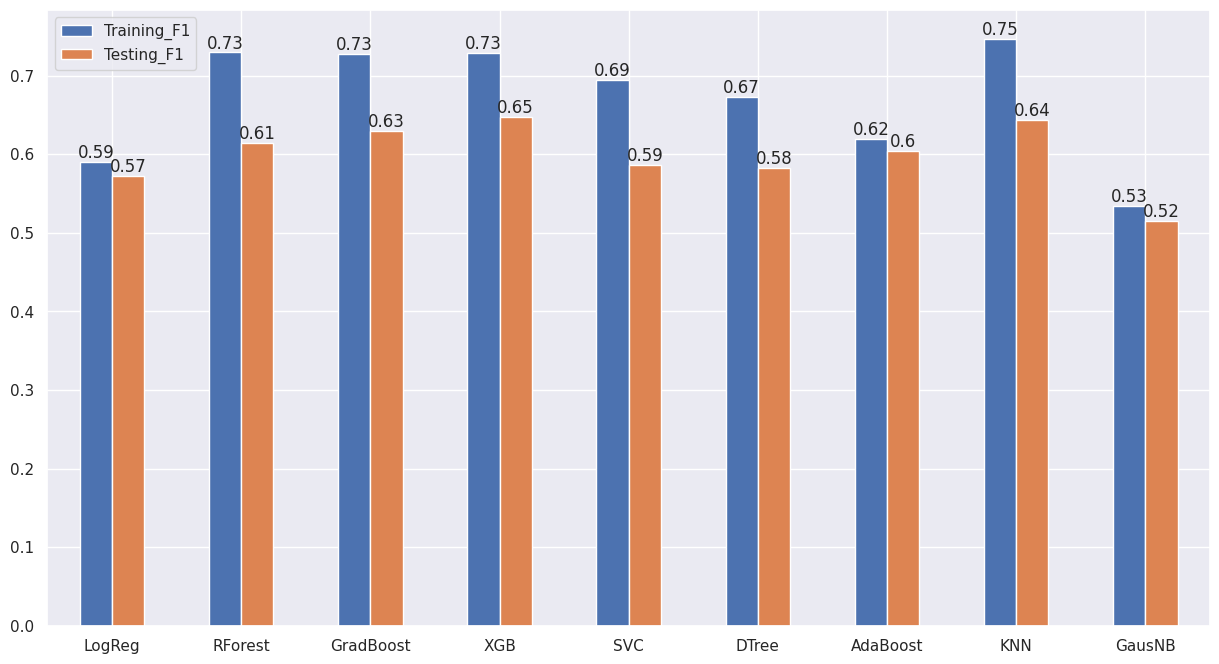

In [54]:
# Visulisation of F1_Scores

ax = F1_Score_df.plot(kind = 'bar', figsize = (15,8))
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0],fmt= '%.2g')
ax.bar_label(ax.containers[1],fmt= '%.2g')
plt.legend(loc = 'upper left')
plt.show()

In [55]:
lr = LogisticRegression().fit(x_train,y_train)
rf = RandomForestClassifier(max_depth=9).fit(x_train,y_train)
gb = GradientBoostingClassifier().fit(x_train,y_train)
xgb = XGBClassifier(max_depth=2, n_estimators=200).fit(x_train, y_train)
svm = SVC().fit(x_train,y_train)
dt = DecisionTreeClassifier(max_depth=8).fit(x_train,y_train)
ab = AdaBoostClassifier().fit(x_train,y_train)
knn = KNeighborsClassifier().fit(x_train,y_train)
gnb = GaussianNB().fit(x_train, y_train)

# Voting Classifier

In [56]:
from sklearn.ensemble import VotingClassifier

# creating a voting classifier based on the models created for prediction
voting = VotingClassifier(estimators=[('logit', lr ),('rforest', rf),('gboost',gb),('XGBoost',xgb),("svm", svm),
                                      ('dtree', dt),('adaboost',ab),('KNN',knn), ('GNBayes', gnb)])

vclassifier = voting.fit(x_train,y_train)
voting_train_pred = voting.predict(x_train)
voting_test_pred = voting.predict(x_test)

print("********Voting Classification Report*********")
print(classification_report(y_train, voting_train_pred))
print()
print(classification_report(y_test, voting_test_pred))
print()
print("********Voting Confusion Matrix*********")
print(confusion_matrix(y_train, voting_train_pred))
print()
print(confusion_matrix(y_test, voting_test_pred))
print()
print("********Voting Accuracy Score*********")
print(accuracy_score(y_train, voting_train_pred))
print()
print(accuracy_score(y_test, voting_test_pred))
print()
print("********Voting F1 Score*********")
print(f1_score(y_train, voting_train_pred, average = 'macro'))
print()
print(f1_score(y_test, voting_test_pred, average = 'macro'))
print()

********Voting Classification Report*********
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1565
           1       0.73      0.43      0.54      1586
           2       0.61      0.85      0.71      1572

    accuracy                           0.71      4723
   macro avg       0.73      0.71      0.70      4723
weighted avg       0.73      0.71      0.70      4723


              precision    recall  f1-score   support

           0       0.79      0.82      0.81       403
           1       0.52      0.29      0.38       382
           2       0.57      0.79      0.66       396

    accuracy                           0.64      1181
   macro avg       0.63      0.63      0.61      1181
weighted avg       0.63      0.64      0.62      1181


********Voting Confusion Matrix*********
[[1353   73  139]
 [ 189  687  710]
 [  56  187 1329]]

[[329  38  36]
 [ 67 112 203]
 [ 18  64 314]]

********Voting Accuracy Score*********
0.71331

# Submission

In [57]:
# Applying the preprocessing function on the test data
test_data = preprocessing(df_test)

In [58]:
# Dropping unwanted features from test data
test_data.drop(cols_to_remove, axis = 1, inplace = True)

In [59]:
# Predicting and saving the predictions to a dataframe
prediction = voting.predict(test_data)
submission = pd.DataFrame({'building_id': test_data.index,'damage_grade':prediction})

In [60]:
# creating a submission.csv file of the predictions
submission.to_csv("submission.csv", index=False)